In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Exercise 2


1. Find a dataset of your choice from the UCI ML repository and import it into your notebook. Choose a dataset either for [classification](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) or for [regression](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) task.
2. Create 3 relevant visualizations for your data (EDA)
3. Split your dataset intro train (80%) - test (20%) unless it is already split by default.
4. Train 3 different ML models of your choice on your data. Make sure you use the right models (don't use classification models for regression task or vice-versa).
5. Evaluate your 3 ML models on your test data.

# 1.

https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation

Predict number of people in the room based on sensor data

In [2]:
df = pd.read_csv("occupancy.csv")

In [3]:
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


# 2.

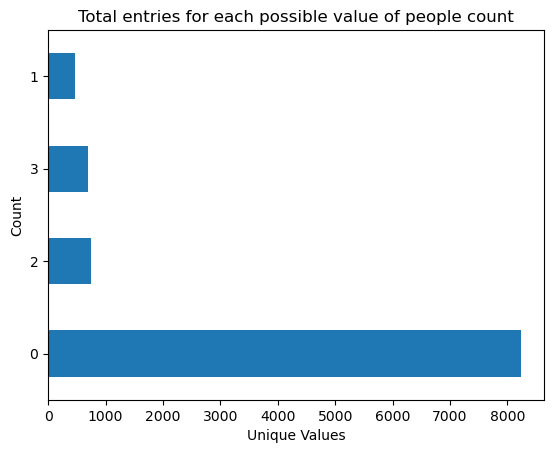

In [4]:
df['Room_Occupancy_Count'].value_counts().plot(kind='barh')

plt.title('Total entries for each possible value of people count')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.show()

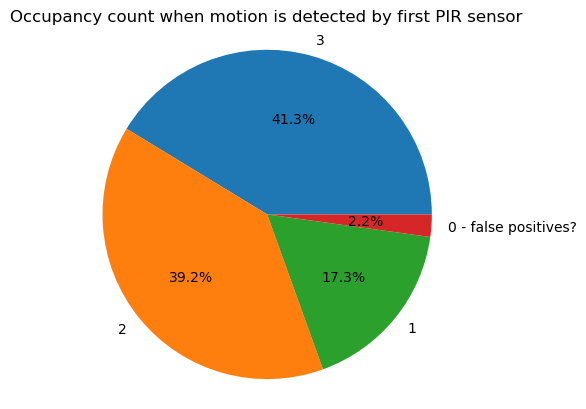

In [5]:
sizes = []
for count in df[df['S6_PIR']==1]['Room_Occupancy_Count'].value_counts():
    sizes.append(count)
    
labels = ['3', '2', '1', '0 - false positives?']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Occupancy count when motion is detected by first PIR sensor')
plt.show()

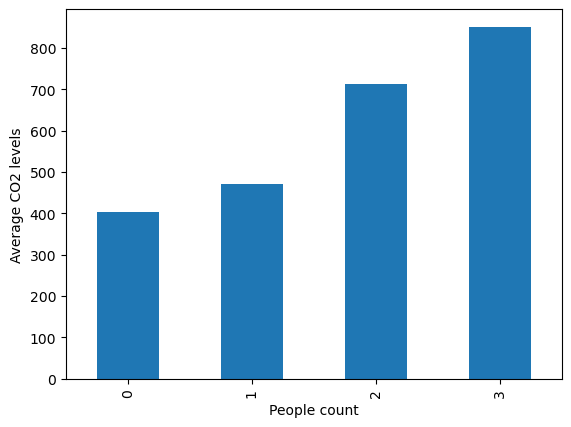

In [6]:
df.groupby('Room_Occupancy_Count')['S5_CO2'].mean().plot(kind='bar')

plt.title('')
plt.xlabel('People count')
plt.ylabel('Average CO2 levels')
plt.show()

# 3.

In [7]:
df = df.drop('Date', axis=1) # axis 1 = column
df = df.drop('Time', axis=1)

y = df.Room_Occupancy_Count.values
x_data = df.drop(['Room_Occupancy_Count'], axis = 1)

# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

# Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

/home/andy/Apps/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/andy/Apps/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


# 4.

In [8]:
accuracies = {}

In [9]:
# KNN Model
k = 3

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(k) 
knn.fit(x_train.T, y_train.T)

prediction = knn.predict(x_test.T)
acc = knn.score(x_test.T, y_test.T)*100
accuracies['3 Nearest Neighbour'] = acc
print("{}NN Score: {:.2f}%".format(k, acc))

/home/andy/Apps/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


3NN Score: 99.26%


/home/andy/Apps/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [10]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.65%


In [11]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 96.69%


# 5.

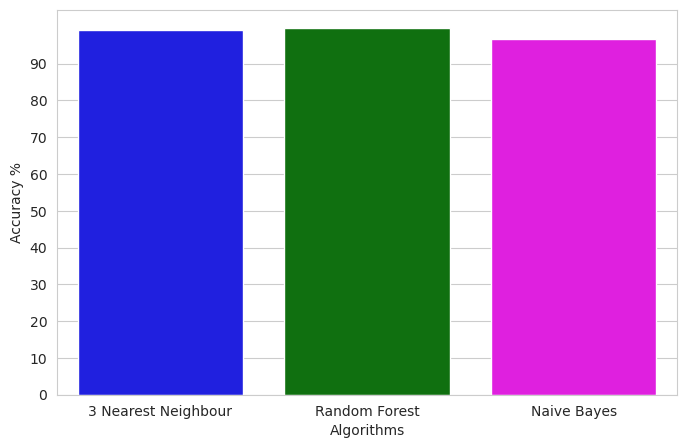

In [12]:
colors = ["blue", "green", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [13]:
# Predicted values
y_head_knn = knn.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test,y_head_knn)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rf = confusion_matrix(y_test,y_head_rf)

/home/andy/Apps/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


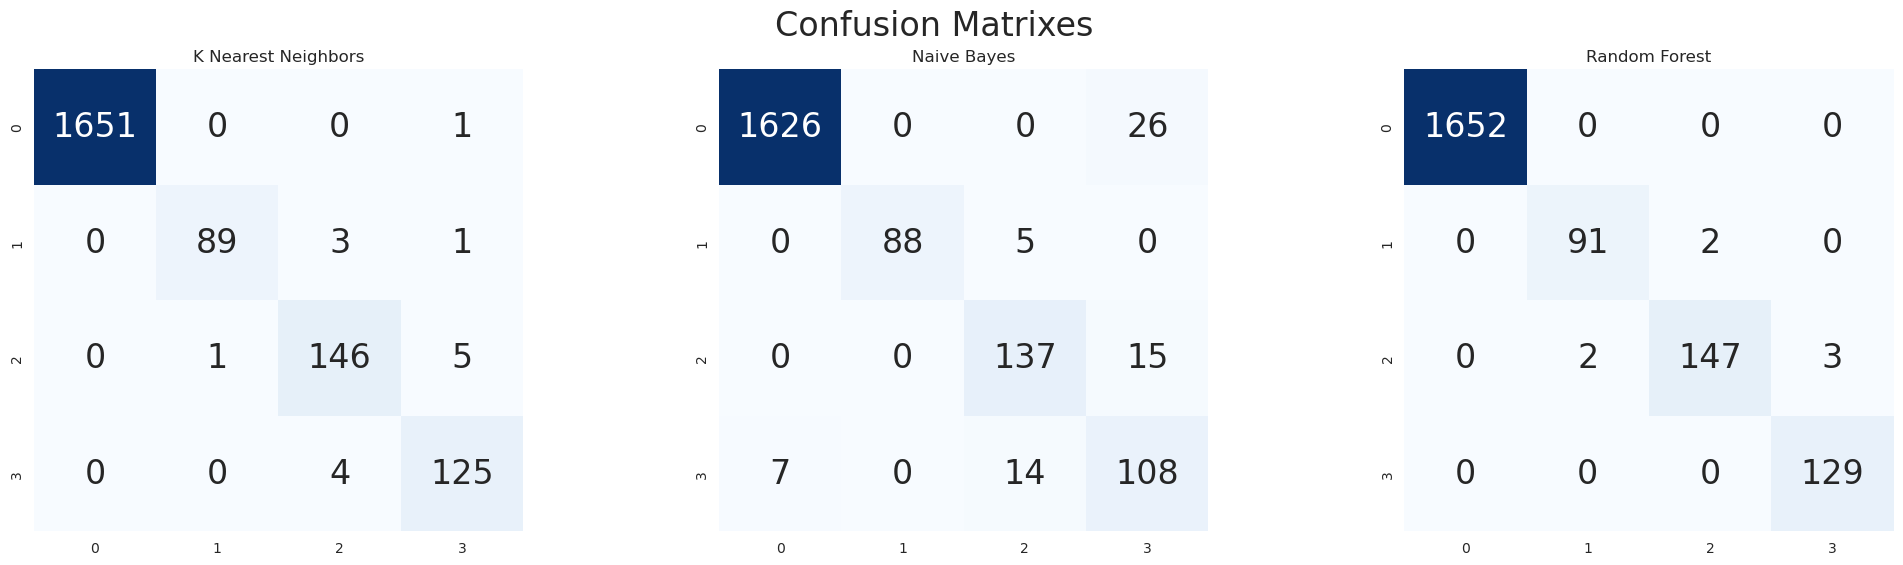

In [14]:
plt.figure(figsize=(24,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


plt.subplot(1,3,1)
plt.title("K Nearest Neighbors")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,2)
plt.title("Naive Bayes")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,3)
plt.title("Random Forest")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

### Horizontal: Actual values

### Vertical: Predicted values